In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv("1apDashboardClientsDetails.csv",skiprows=1, index_col=False)
data2 = pd.read_csv("2apDashboardClientsDetails.csv",skiprows=1, index_col=False)
#data = pd.concat([data1, data2])

In [9]:
#return distance 
import math
def calculateDistance(signalLevelInDb, freqInMHz):
    if math.fabs(signalLevelInDb)>80:
        # we consider Signal Strength < -80 dBm as disconnected since connection is weak by then.  
        return 0
    else:
        exp = (27.55 - (20 * math.log10(freqInMHz)) + math.fabs(signalLevelInDb)) / 20.0
        return math.pow(10.0, exp)

In [16]:
#group data by ssid(AP), Client(devices) order by date time. 
data = data1.copy()
sp_data = data[['ssid','Client','Date time','channelFreq','signalStrength']]
sp_data = sp_data.groupby(['ssid','Client','Date time']).mean().reset_index()
sp_data.sort_values(['Client','Date time'], ascending=True) 
sp_data

,ssid,Client,Date time,channelFreq,signalStrength
0,APT_4125,2c:59:8a:6b:53:c5,2019-03-05 23:59:01,5240.0,-54.0
1,APT_4125,2c:59:8a:6b:53:c5,2019-03-06 00:00:01,5240.0,-52.0
2,APT_4125,2c:59:8a:6b:53:c5,2019-03-06 00:01:01,5240.0,-55.0
3,APT_4125,2c:59:8a:6b:53:c5,2019-03-06 00:02:01,5240.0,-55.0
4,APT_4125,2c:59:8a:6b:53:c5,2019-03-06 00:03:01,5240.0,-55.0
...,...,...,...,...,...
115839,APT_4840,c0:ee:fb:dd:2f:ed,2019-03-06 14:40:01,2437.0,-60.0
115840,APT_4840,c0:ee:fb:dd:2f:ed,2019-03-06 14:40:31,5220.0,-55.0
115841,APT_4840,c0:ee:fb:dd:2f:ed,2019-03-06 14:41:31,5220.0,-54.0
115842,APT_4840,c0:ee:fb:dd:2f:ed,2019-03-06 14:42:31,5220.0,-53.0


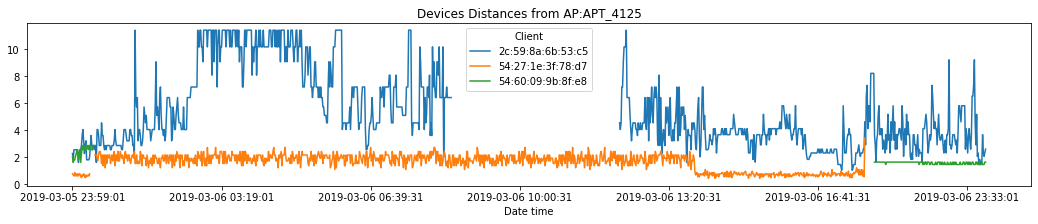

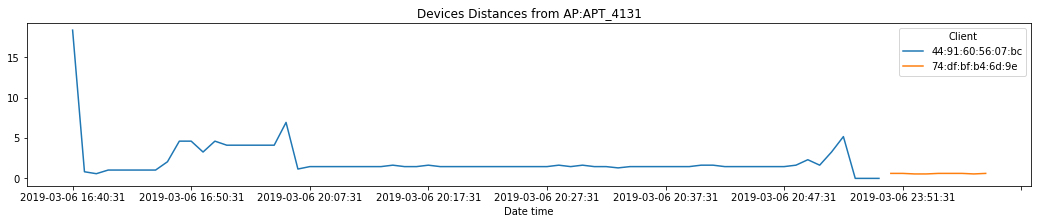

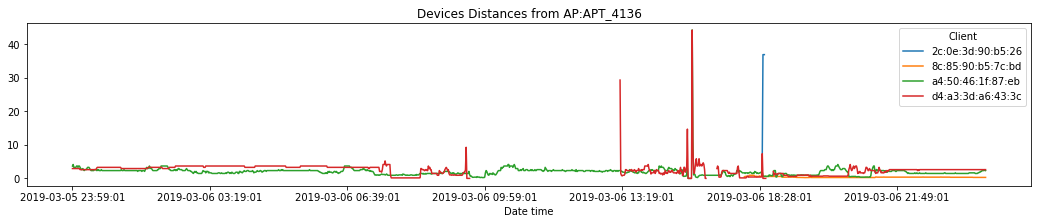

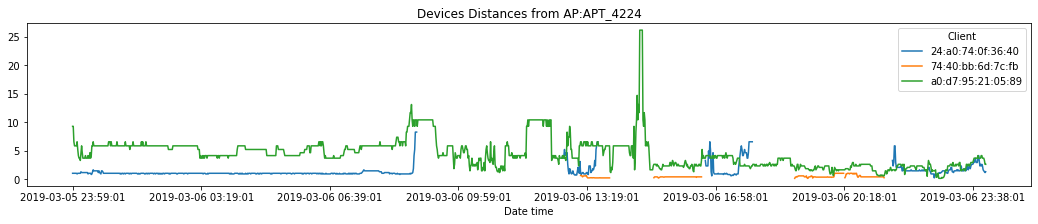

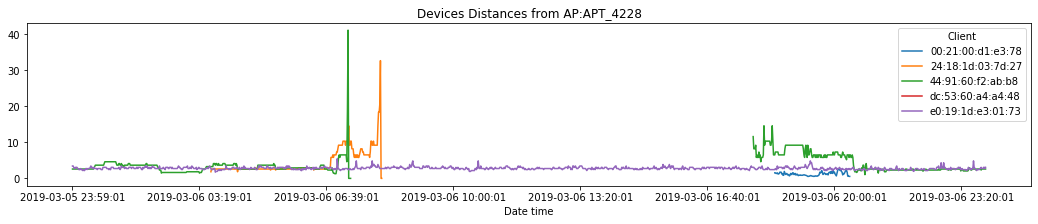

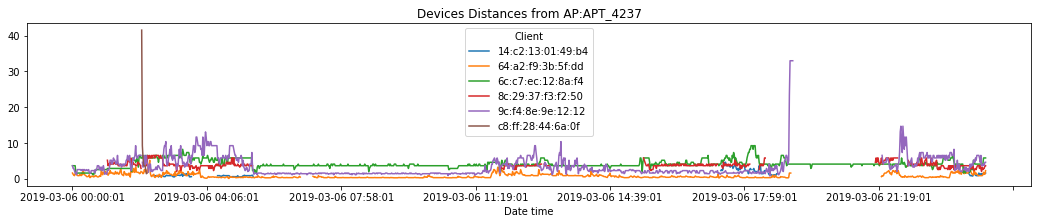

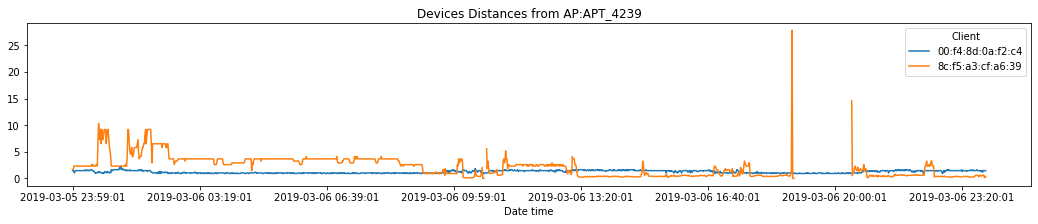

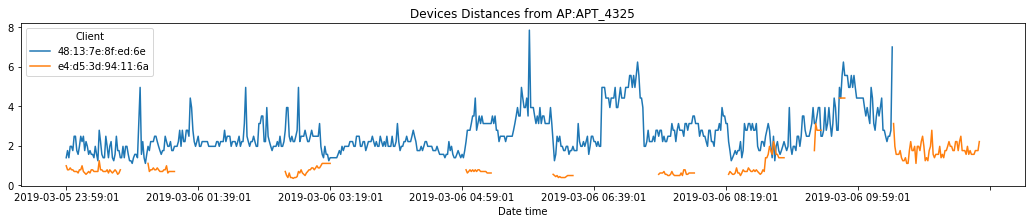

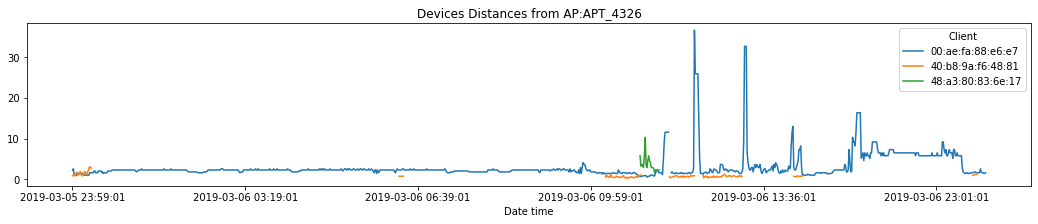

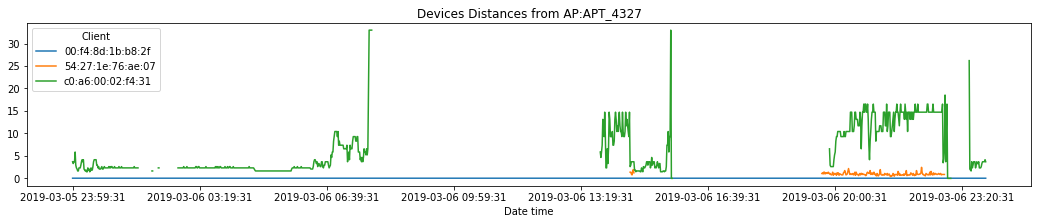

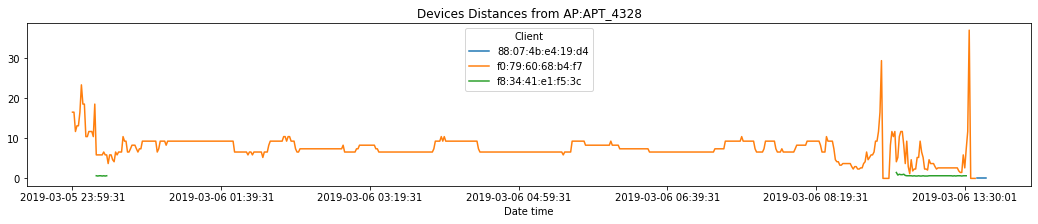

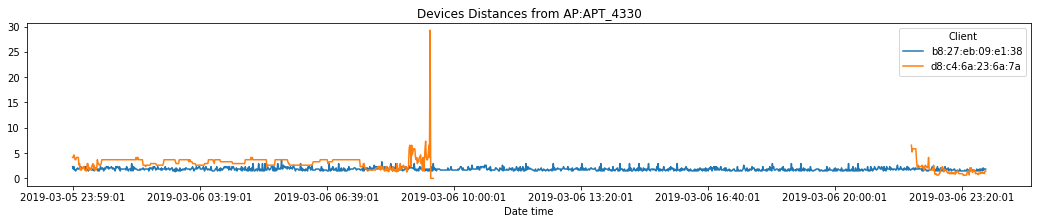

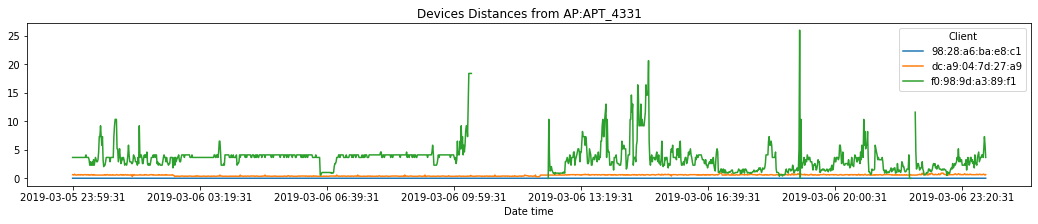

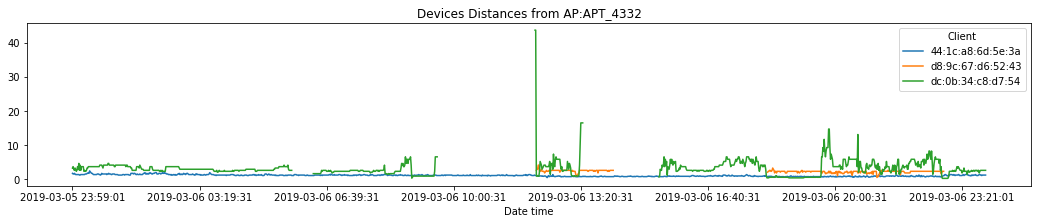

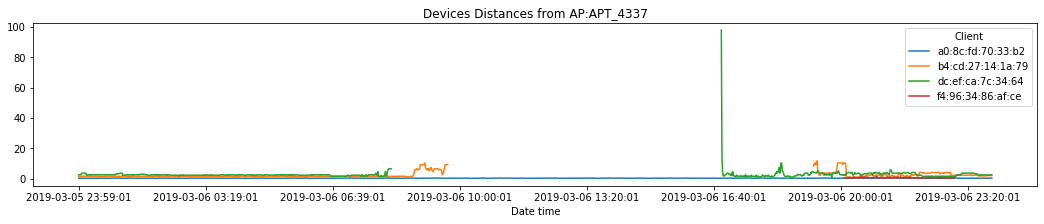

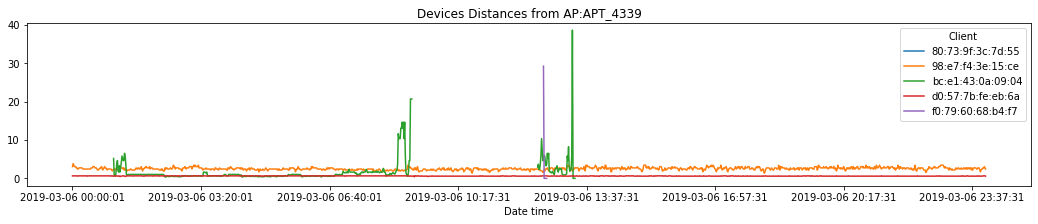

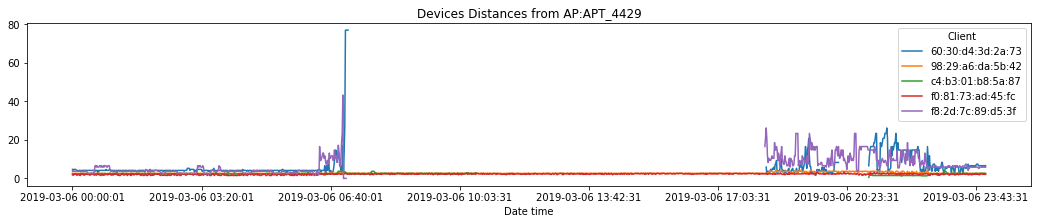

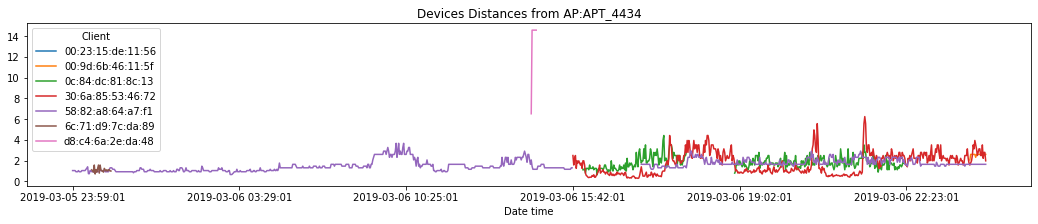

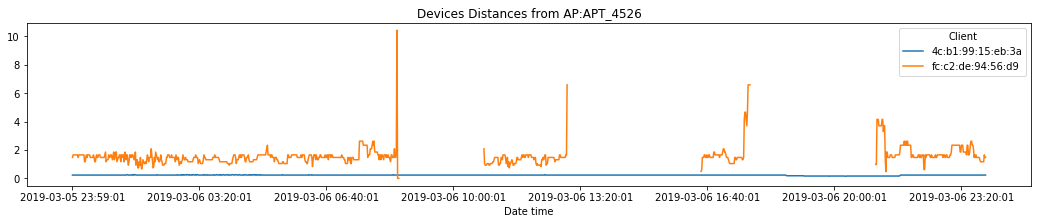

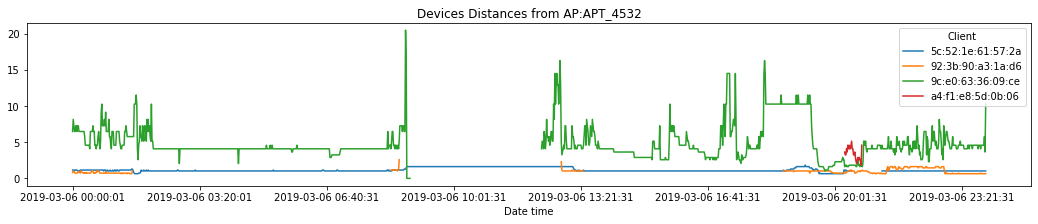

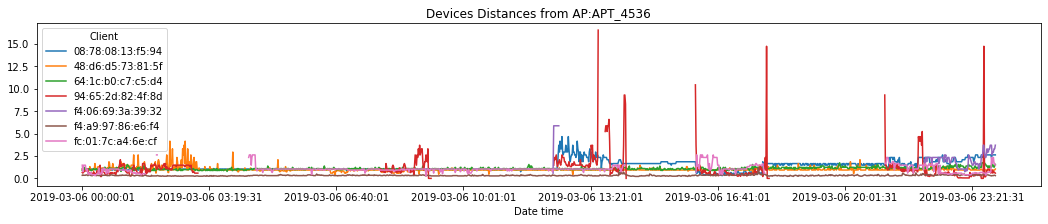

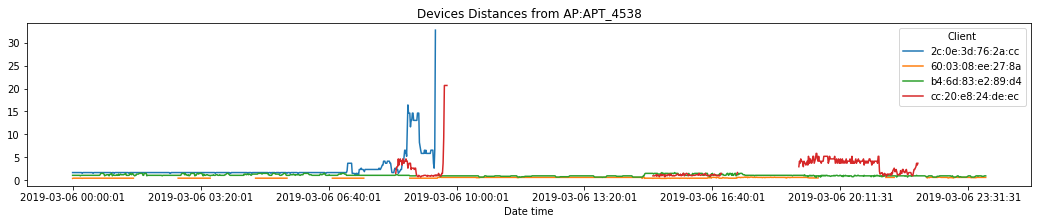

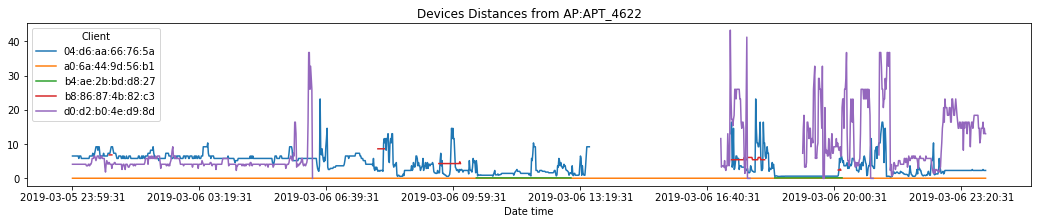

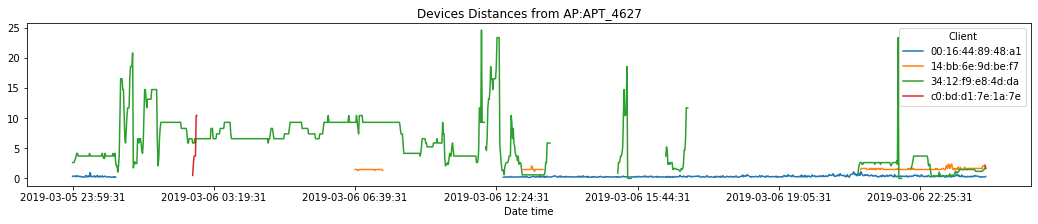

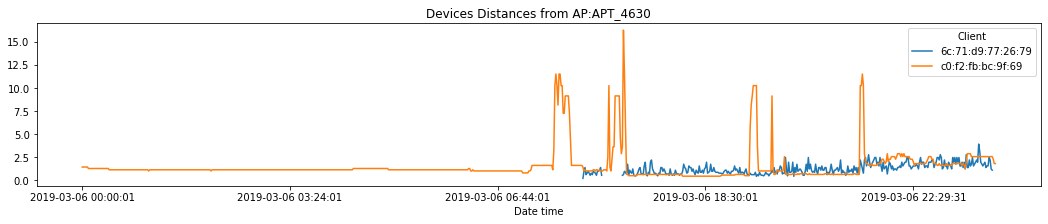

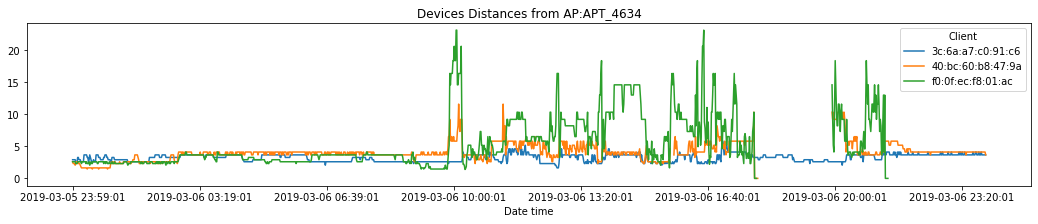

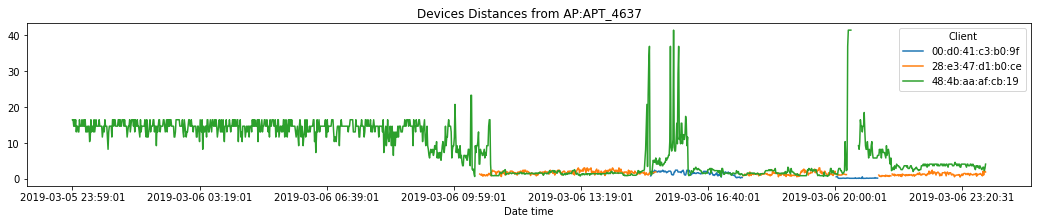

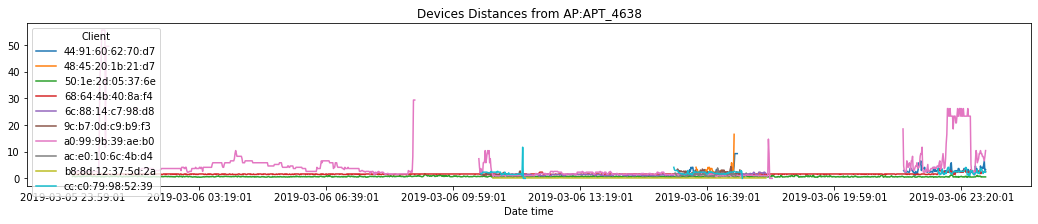

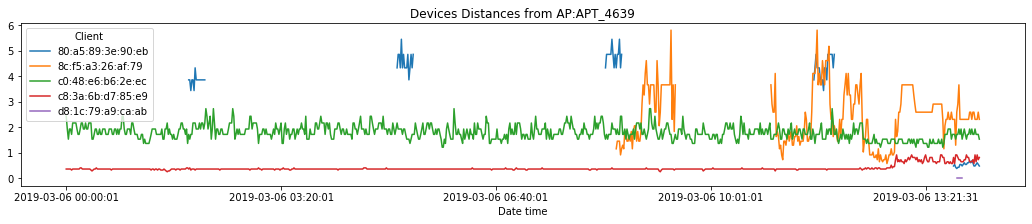

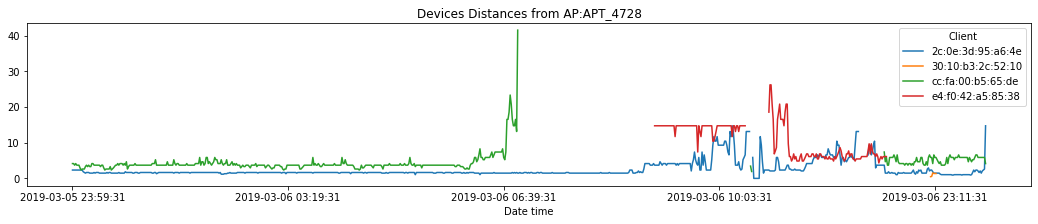

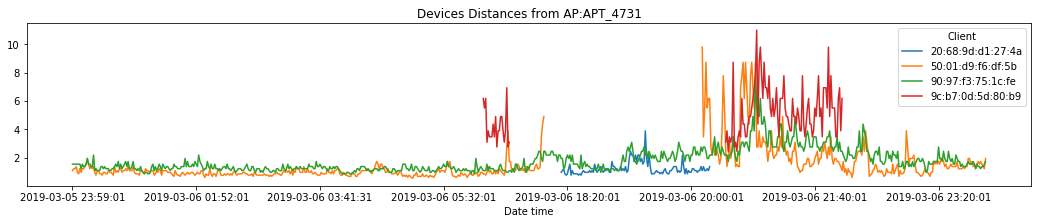

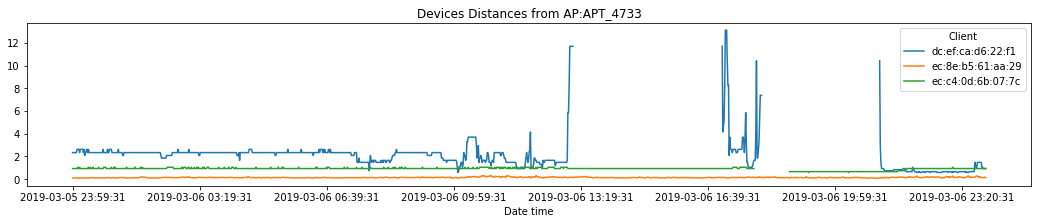

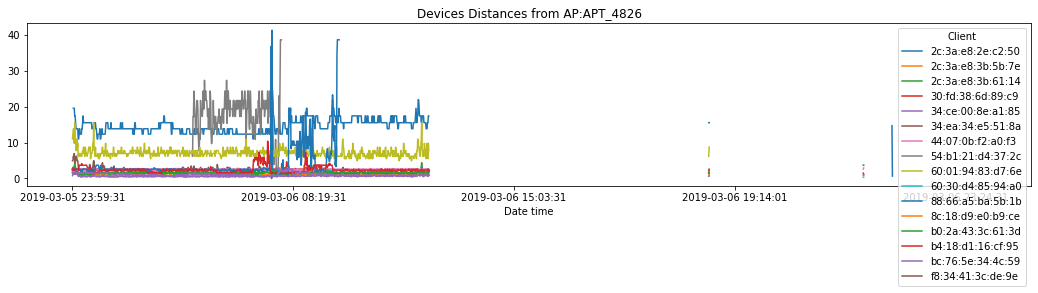

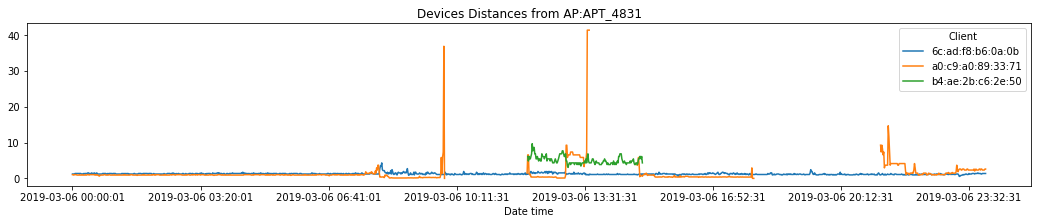

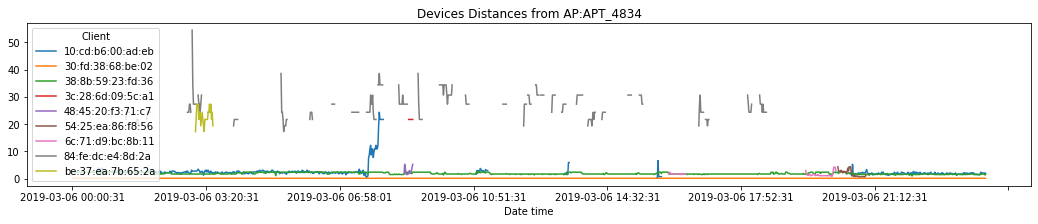

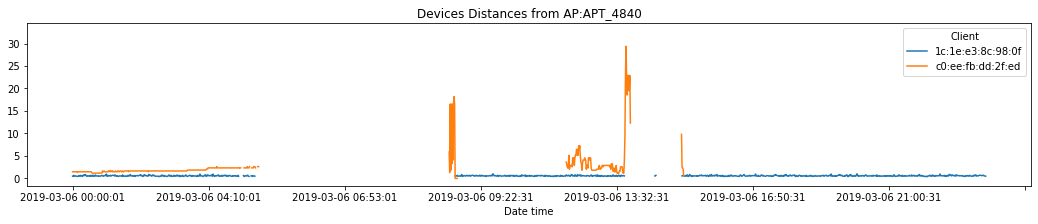

In [17]:
import warnings
warnings.filterwarnings('ignore')

aps = sp_data['ssid'].unique()

for ap in aps:
    ap_data = sp_data[sp_data.ssid==ap] 
    ap_data['distance'] = ap_data.apply(lambda row: calculateDistance(row.signalStrength, row.channelFreq), axis = 1)
    
    ap_data = ap_data.pivot(index='Date time', columns='Client', values='distance')
    ap_data.plot(title = 'Devices Distances from AP:'+ap,figsize=(18,3))

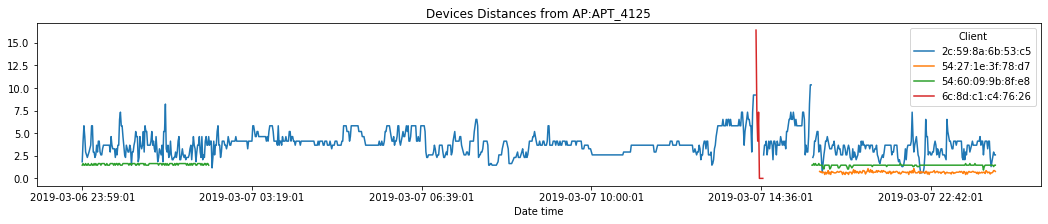

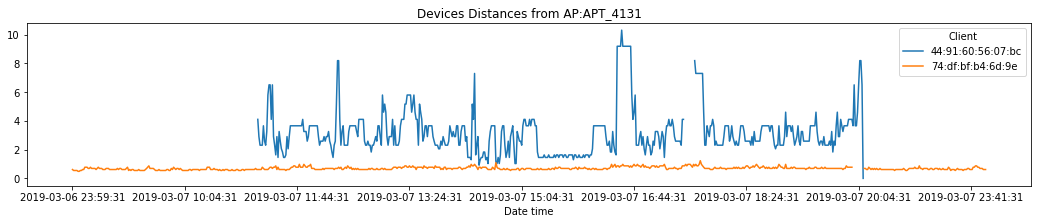

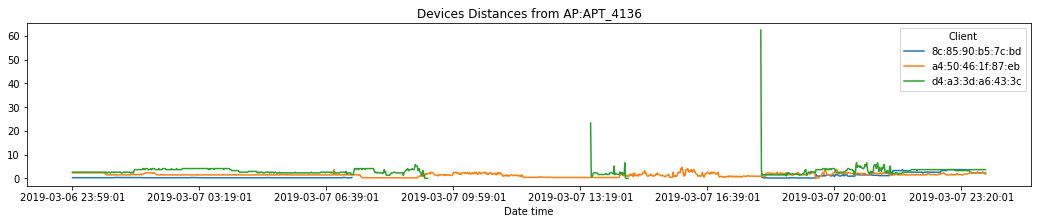

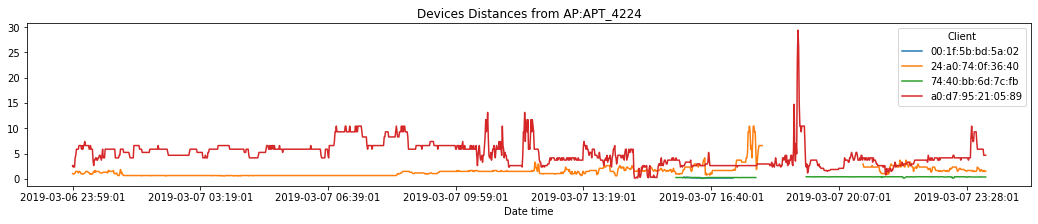

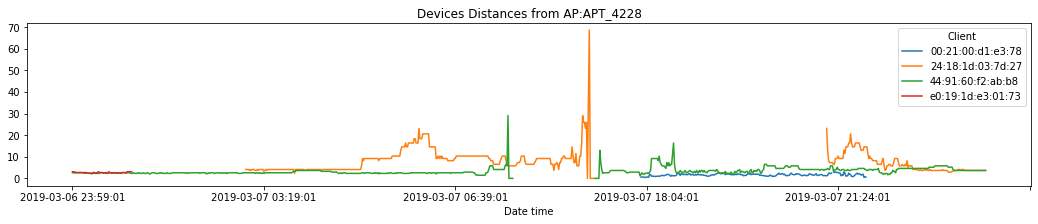

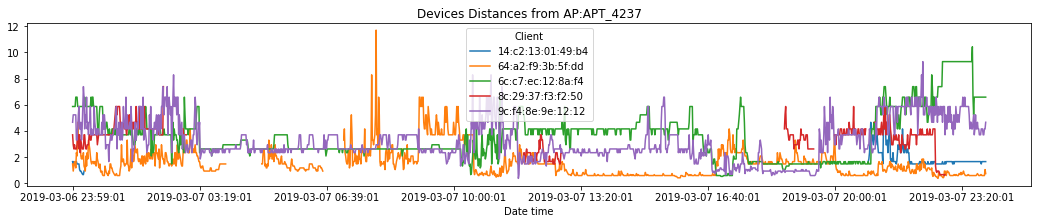

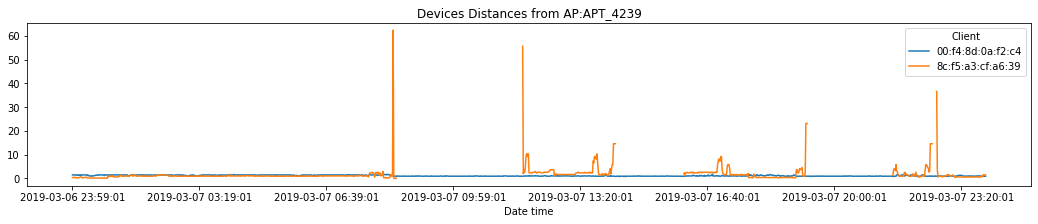

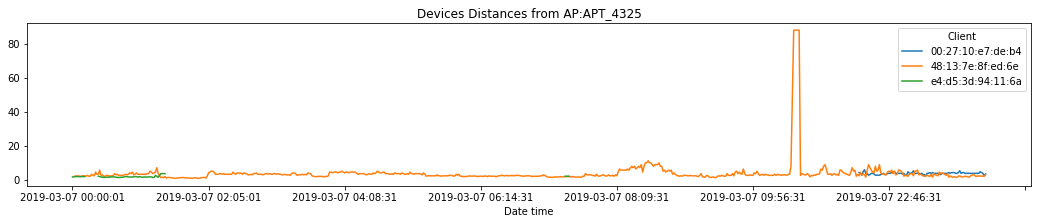

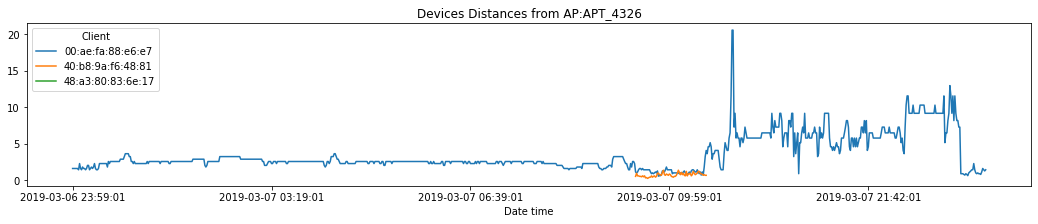

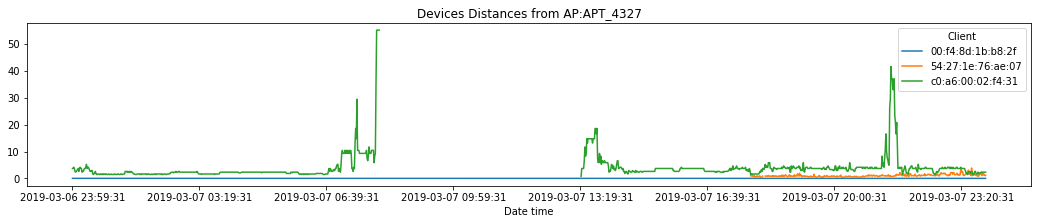

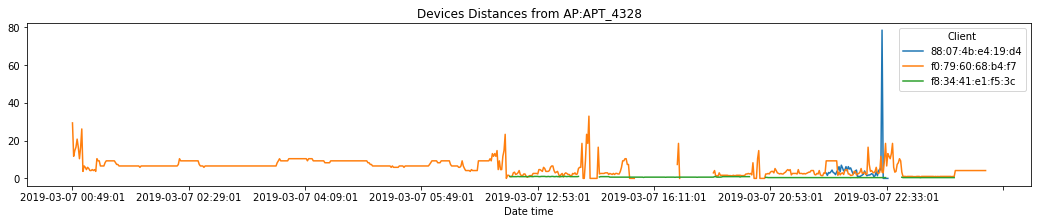

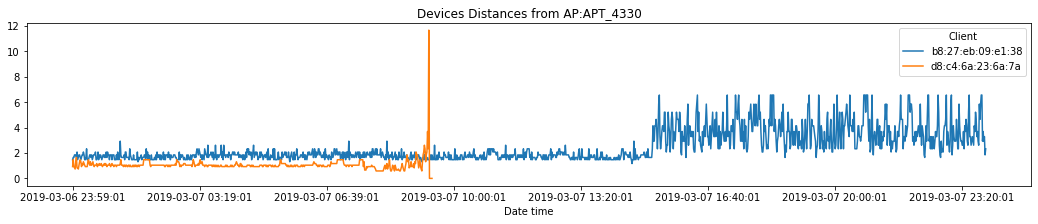

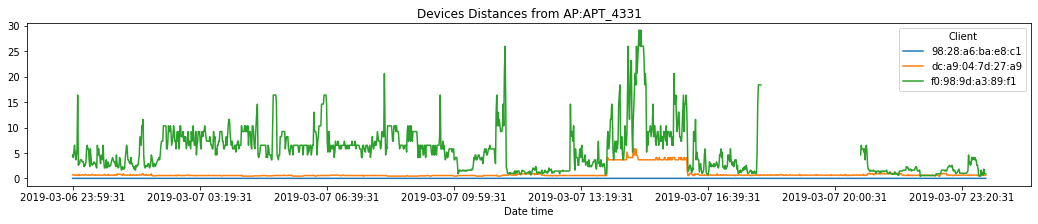

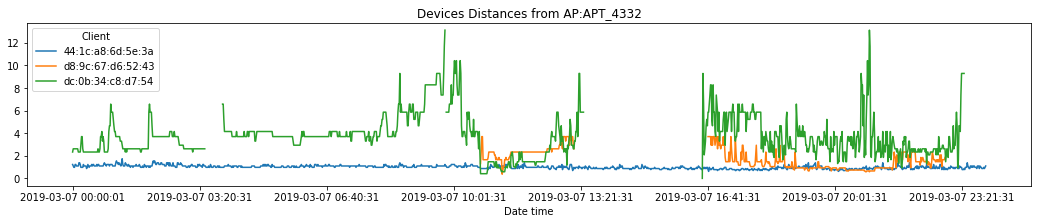

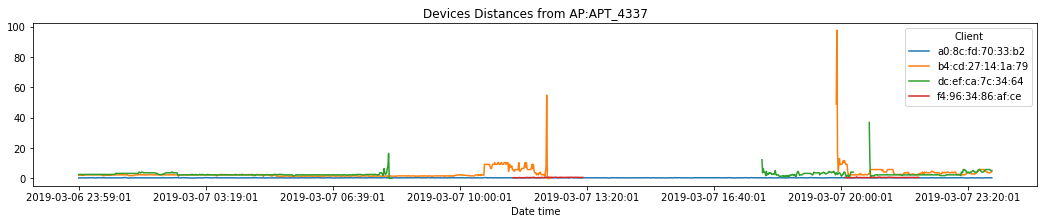

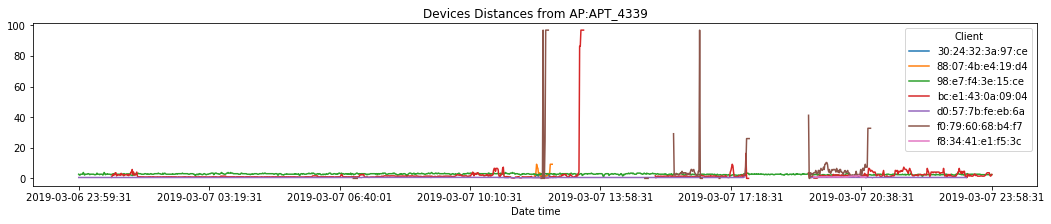

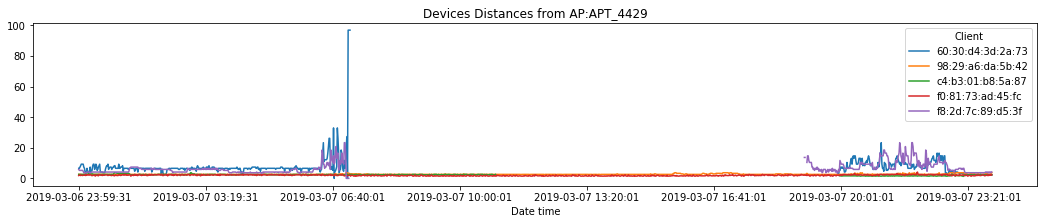

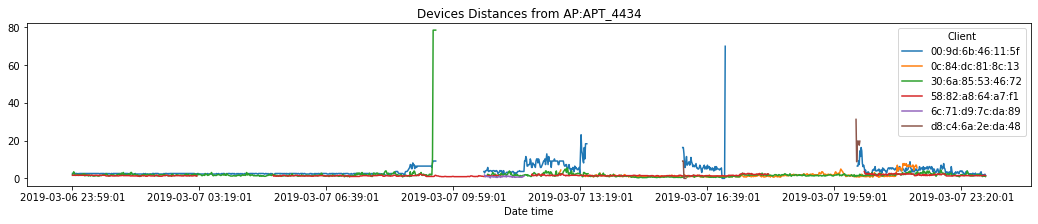

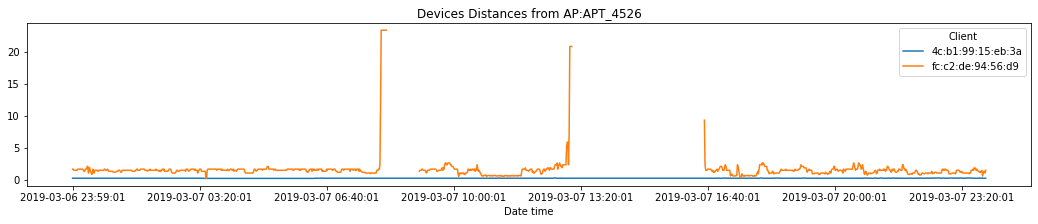

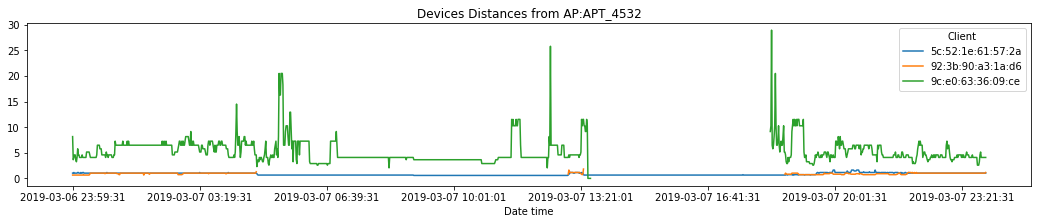

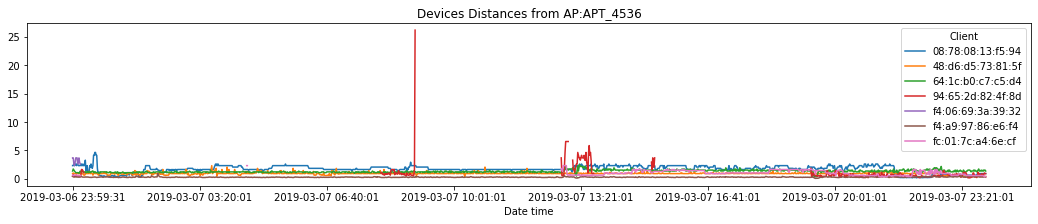

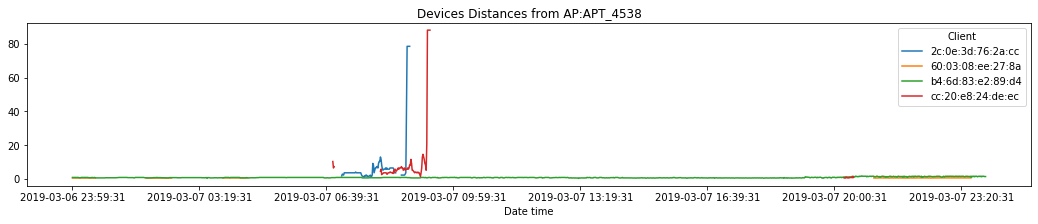

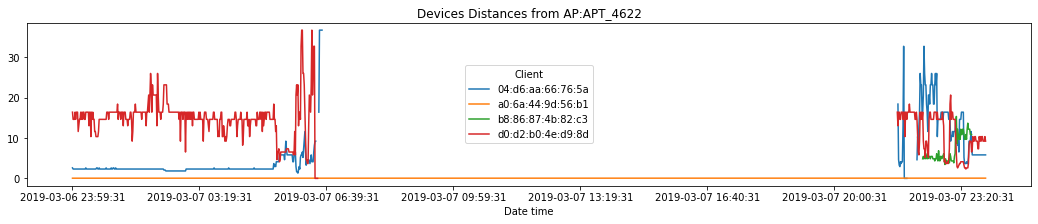

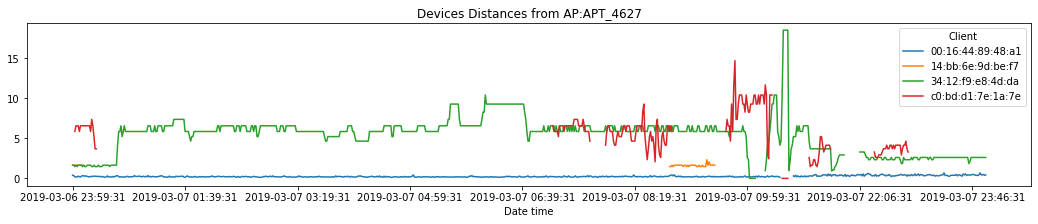

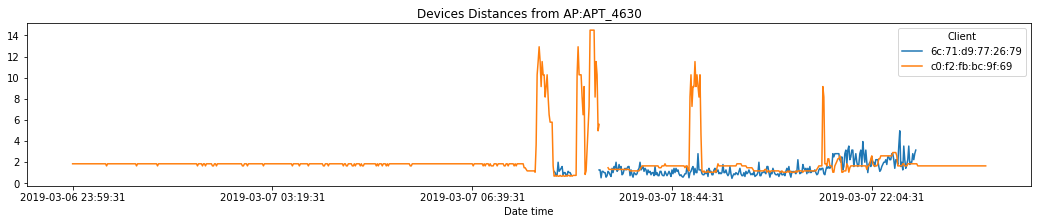

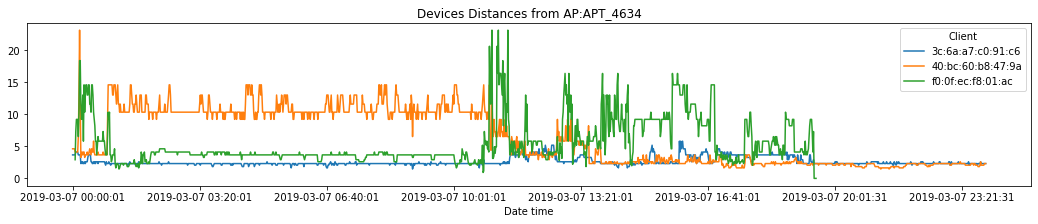

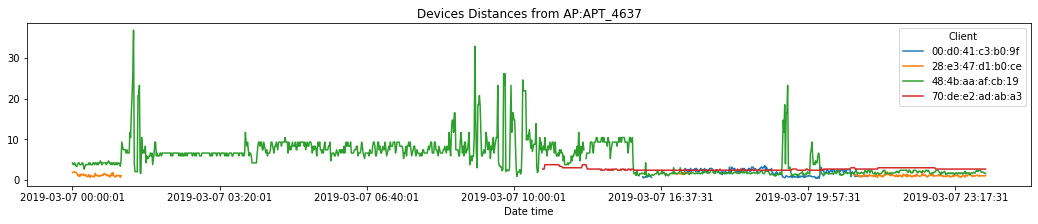

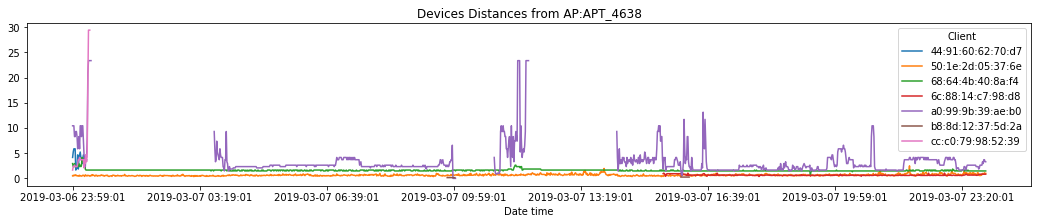

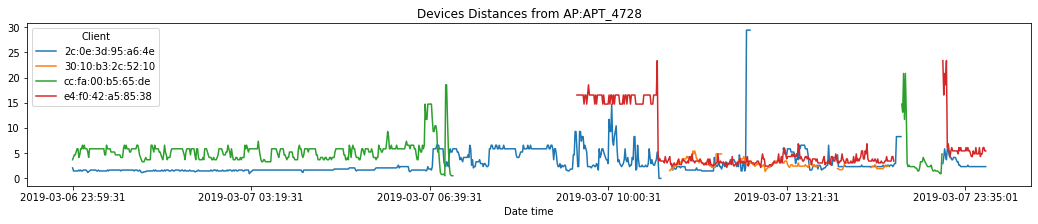

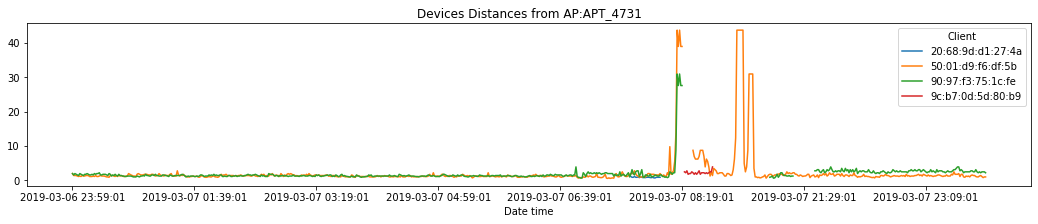

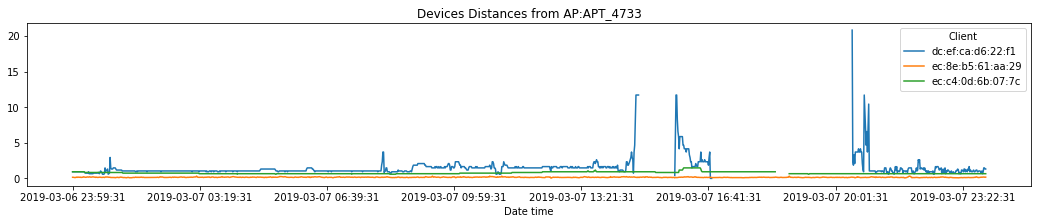

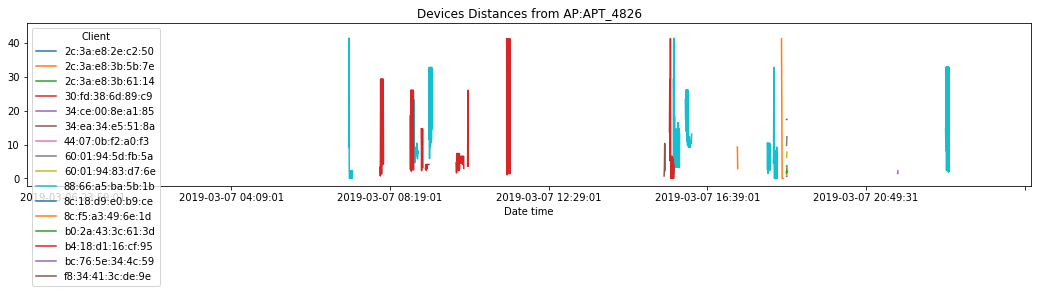

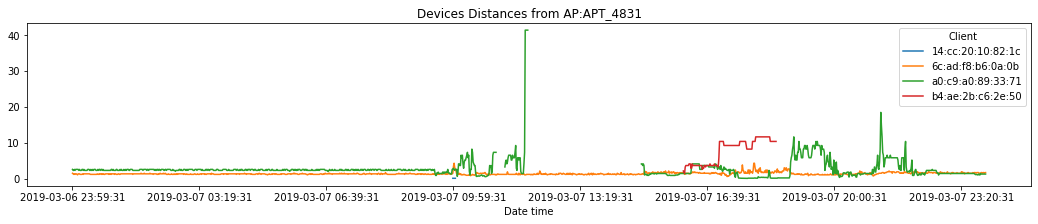

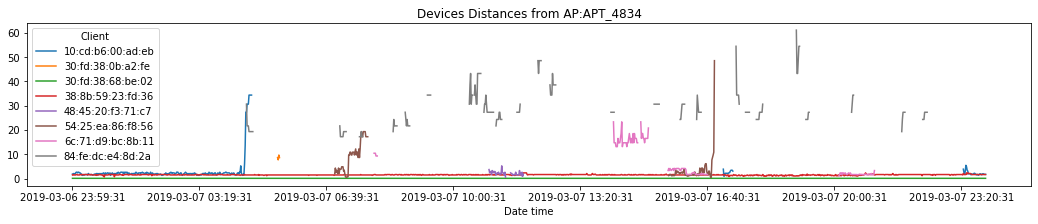

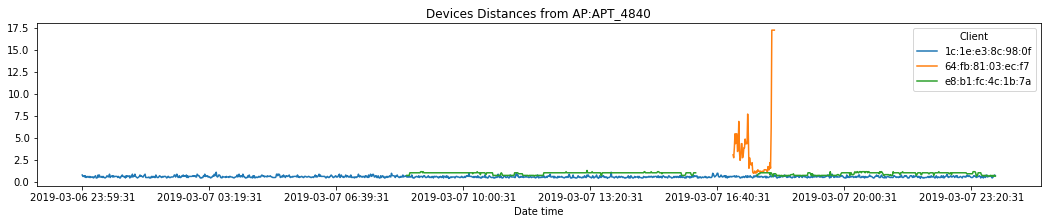

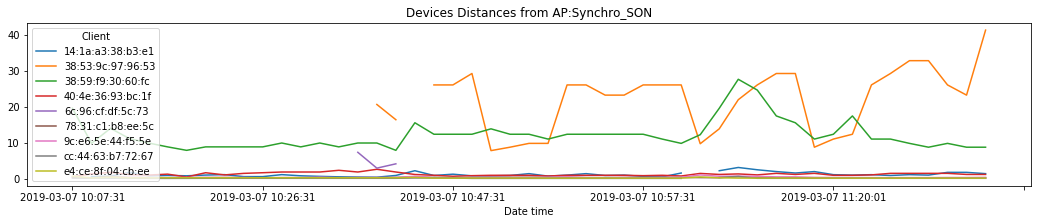

In [15]:
# test with file2
data = data2.copy()
sp_data = data[['ssid','Client','Date time','channelFreq','signalStrength']]
sp_data = sp_data.groupby(['ssid','Client','Date time']).mean().reset_index()
sp_data.sort_values(['Client','Date time'], ascending=True) 

aps = sp_data['ssid'].unique()

for ap in aps:
    ap_data = sp_data[sp_data.ssid==ap] 
    ap_data['distance'] = ap_data.apply(lambda row: calculateDistance(row.signalStrength, row.channelFreq), axis = 1)
    
    ap_data = ap_data.pivot(index='Date time', columns='Client', values='distance')
    ap_data.plot(title = 'Devices Distances from AP:'+ap,figsize=(18,3))